In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from Cliffwalking import Grid
from Cliffwalking import State

In [4]:
EPSILON = 0.1

In [5]:
def epsilon_greedy(state, q_values):
    actions = list(q_values[state.y][state.x].keys())
    if random.random() < EPSILON:
        action = random.choice(actions)
    else:
        action_values = [q_values[state.y][state.x].get(action) for action in actions]
        max_action_value = max(action_values)
        arg_max_indexes = [i for i in range(len(action_values)) if action_values[i] == max_action_value]
        action = actions[random.choice(arg_max_indexes)]
    return action

In [6]:
def get_action_with_max_q_value(state, q_values):
    actions = list(q_values[state.y][state.x].keys())
    action_values = [q_values[state.y][state.x].get(action) for action in actions]
    max_action_value = max(action_values)
    arg_max_indexes = [i for i in range(len(action_values)) if action_values[i] == max_action_value]
    action = actions[random.choice(arg_max_indexes)]
    return action

In [7]:
def sarsa(grid, epoch, alpha, gamma):
    paths = []
    rewards = []
    q_values = grid.init_q_values()
    for i in range(epoch):
        path = []
        current_state = grid.start_state
        action = epsilon_greedy(current_state, q_values)
        total_reward = 0.0
        while current_state != grid.goal_state:
            path = path + [current_state]
            # print('Current x:%s and y:%s' % (current_state.x, current_state.y))
            # print('Take action %s' % action)
            next_state = grid.take_action(current_state, action)
            # print('Next x:%s and y:%s' % (next_state.x, next_state.y))
            reward = next_state.reward
            next_action = epsilon_greedy(next_state, q_values)
            # print('Take next action %s' % next_action)
            q_values[current_state.y][current_state.x][action] = q_values[current_state.y][current_state.x][
                                                                     action] + alpha * (
                                                                         reward + gamma *
                                                                         q_values[next_state.y][next_state.x][
                                                                             next_action] -
                                                                         q_values[current_state.y][current_state.x][
                                                                             action])

            current_state = next_state
            action = next_action
            total_reward += reward
        path = path + [grid.goal_state]
        paths.append(path)
        rewards.append([total_reward])
    return paths, rewards

In [8]:
def qlearning(grid, epoch, alpha, gamma):
    paths = []
    rewards = []
    q_values = grid.init_q_values()
    for i in range(epoch):
        path = []
        current_state = grid.start_state
        total_reward = 0.0
        while current_state != grid.goal_state:
            path = path + [current_state]
            action = epsilon_greedy(current_state, q_values)
            # print('Current x:%s and y:%s' % (current_state.x, current_state.y))
            # print('Take action %s' % action)
            next_state = grid.take_action(current_state, action)
            # print('Next x:%s and y:%s' % (next_state.x, next_state.y))
            reward = next_state.reward
            next_action = get_action_with_max_q_value(next_state, q_values)
            # print('Take next action %s' % next_action)
            q_values[current_state.y][current_state.x][action] = q_values[current_state.y][current_state.x][
                                                                     action] + alpha * (
                                                                         reward + gamma *
                                                                         q_values[next_state.y][next_state.x][
                                                                             next_action] -
                                                                         q_values[current_state.y][current_state.x][
                                                                             action])
            current_state = next_state
            total_reward += reward
        path = path + [grid.goal_state]
        paths.append(path)
        rewards = rewards + [total_reward]
    return paths, rewards

In [13]:
epoch = 4000
alpha = 0.5
gamma = 1.0
grid = Grid(4, 12)
sarsa_paths, sarsa_rewards = sarsa(grid, epoch, alpha, gamma)
qlearning_paths, qlearning_rewards = qlearning(grid, epoch, alpha, gamma)

In [14]:
print('Sarsa Path \n')
grid.print_path(sarsa_paths[-1])

Sarsa Path 

0 1 1 1 1 1 1 1 1 1 1 1 
1 1 0 0 0 0 0 0 0 0 0 1 
1 0 0 0 0 0 0 0 0 0 0 1 
1 C C C C C C C C C C 1 



In [15]:
print('Q-Learning Path \n')
grid.print_path(qlearning_paths[-1])

Q-Learning Path 

0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 1 1 1 1 
1 C C C C C C C C C C 1 



In [16]:
## NOTE: Used code in http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=200,window='hanning'):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [17]:
smoothed_sarsa = smooth(np.ravel(sarsa_rewards))
smoothed_qlearning = smooth(np.ravel(qlearning_rewards))

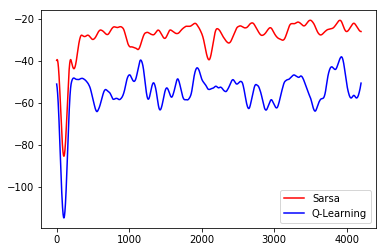

In [18]:
t = np.arange(0, len(smoothed_sarsa), 1)
plt.plot(smoothed_sarsa, 'r-',label="Sarsa")
plt.plot(smoothed_qlearning, 'b-',label="Q-Learning")
plt.legend()

plt.show()